In [ ]:
import torch
import torchvision
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.5.1+cu121
torchvision version: 0.20.1+cu121


# Download datset

In [1]:
import zipfile
import requests
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "cards"

if image_path.is_dir():
  print(f"{image_path} directory already exist")
else:
  print(f"Downloading dataset...")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "cards_dataset.zip", "wb") as f:
  response = requests.get("https://www.kaggle.com/api/v1/datasets/download/gpiosenka/cards-image-datasetclassification")
  f.write(response.content)

with zipfile.ZipFile(data_path / "cards_dataset.zip", "r") as zip_ref:
  print(f"Unzipping cards_dataset.zip...")
  zip_ref.extractall(image_path)

Unzipping cards_dataset.zip...


# Data preparation and data exploration

In [ ]:
train_dir = image_path / "train"
valid_dir = image_path / "valid"
test_dir = image_path / "test"

image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

[PosixPath('data/cards/valid/jack of spades/3.jpg'),
 PosixPath('data/cards/valid/jack of spades/5.jpg'),
 PosixPath('data/cards/valid/jack of spades/1.jpg'),
 PosixPath('data/cards/valid/jack of spades/2.jpg'),
 PosixPath('data/cards/valid/jack of spades/4.jpg'),
 PosixPath('data/cards/valid/queen of clubs/3.jpg'),
 PosixPath('data/cards/valid/queen of clubs/5.jpg'),
 PosixPath('data/cards/valid/queen of clubs/1.jpg'),
 PosixPath('data/cards/valid/queen of clubs/2.jpg'),
 PosixPath('data/cards/valid/queen of clubs/4.jpg'),
 PosixPath('data/cards/valid/ten of diamonds/3.jpg'),
 PosixPath('data/cards/valid/ten of diamonds/5.jpg'),
 PosixPath('data/cards/valid/ten of diamonds/1.jpg'),
 PosixPath('data/cards/valid/ten of diamonds/2.jpg'),
 PosixPath('data/cards/valid/ten of diamonds/4.jpg'),
 PosixPath('data/cards/valid/queen of spades/3.jpg'),
 PosixPath('data/cards/valid/queen of spades/5.jpg'),
 PosixPath('data/cards/valid/queen of spades/1.jpg'),
 PosixPath('data/cards/valid/queen of 

## Visualize samples of dataset

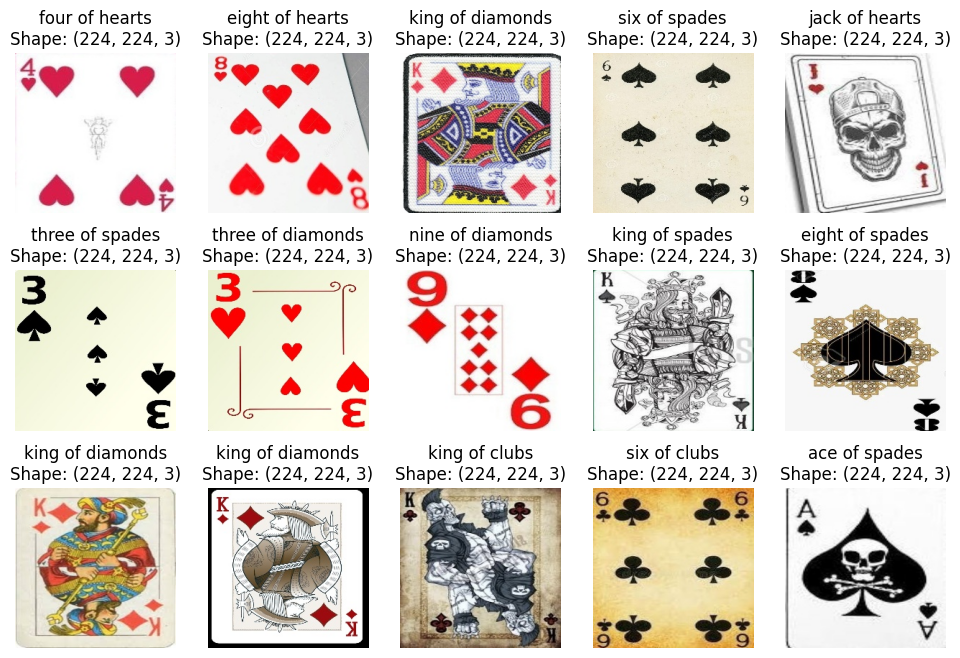

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Visualize samples and check image shape
plt.figure(figsize=(12,8))
row, col = 3, 5
for i in range(row * col):
  random_image = random.choice(image_path_list)
  image_class = random_image.parent.stem
  image = Image.open(random_image)
  image = np.array(image)

  plt.subplot(row, col, i+1)
  plt.imshow(image)
  plt.axis(False)
  plt.title(f"{image_class}\nShape: {image.shape}")

## Load and transforms data

In [ ]:
from torchvision import transforms, datasets

train_transformer = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_valid_transformer = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transformed_train_data = datasets.ImageFolder(train_dir,
                                              train_transformer)

transformed_valid_data = datasets.ImageFolder(valid_dir,
                                              test_valid_transformer)

transformed_test_data = datasets.ImageFolder(test_dir,
                                              test_valid_transformer)

transformed_train_data, transformed_valid_data, transformed_test_data

(Dataset ImageFolder
     Number of datapoints: 7624
     Root location: data/cards/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 265
     Root location: data/cards/valid
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 265
     Root location: data/cards/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.45

In [ ]:
classes_name = transformed_train_data.classes
classes_name

['ace of clubs',
 'ace of diamonds',
 'ace of hearts',
 'ace of spades',
 'eight of clubs',
 'eight of diamonds',
 'eight of hearts',
 'eight of spades',
 'five of clubs',
 'five of diamonds',
 'five of hearts',
 'five of spades',
 'four of clubs',
 'four of diamonds',
 'four of hearts',
 'four of spades',
 'jack of clubs',
 'jack of diamonds',
 'jack of hearts',
 'jack of spades',
 'joker',
 'king of clubs',
 'king of diamonds',
 'king of hearts',
 'king of spades',
 'nine of clubs',
 'nine of diamonds',
 'nine of hearts',
 'nine of spades',
 'queen of clubs',
 'queen of diamonds',
 'queen of hearts',
 'queen of spades',
 'seven of clubs',
 'seven of diamonds',
 'seven of hearts',
 'seven of spades',
 'six of clubs',
 'six of diamonds',
 'six of hearts',
 'six of spades',
 'ten of clubs',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'three of clubs',
 'three of diamonds',
 'three of hearts',
 'three of spades',
 'two of clubs',
 'two of diamonds',
 'two of hearts',
 'two o

### Visualize transformed image

In [ ]:
def plot_transformed_image(image_path: list, transforms, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_images_path = random.sample(image_path, k=n)
  for image_path in random_images_path:
    with Image.open(image_path) as img:
      fig, ax = plt.subplots(1,2,figsize=(6,3))
      fig.suptitle("Before, after transformation")

      ax[0].imshow(img)
      ax[0].set_title("Before")
      ax[0].axis(False)

      img = transforms(img).permute(1,2,0)
      ax[1].imshow(img)
      ax[1].set_title("After")
      ax[1].axis(False)

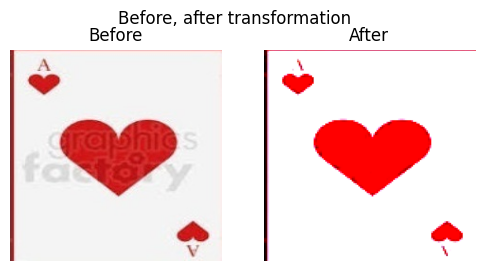

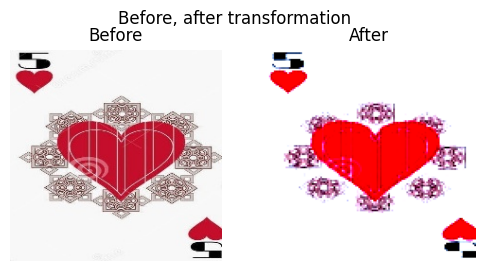

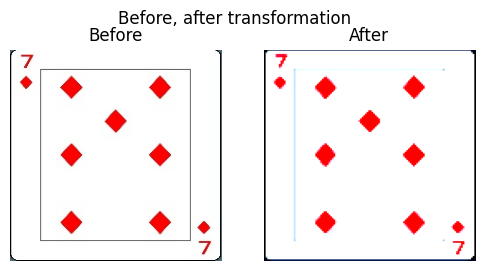

In [ ]:
plot_transformed_image(image_path_list,
                       train_transformer,
                       n=3)

## Turn images to `DataLoader`

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(transformed_train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

valid_dataloader = DataLoader(transformed_valid_data,
                              batch_size=BATCH_SIZE)

test_dataloader = DataLoader(transformed_test_data,
                             batch_size=BATCH_SIZE)

len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(239, 9, 9)

In [ ]:
# Chaeck batch size and shape
image, label = next(iter(train_dataloader))
image.shape, label.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

# Create ResNet50 model

In [ ]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

weight = torchvision.models.ResNet50_Weights.DEFAULT
resnet = torchvision.models.resnet50(pretrained=True).to(device)

num_in_features = resnet.fc.in_features
output_shape = len(classes_name)

resnet.fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=num_in_features,
                    out_features=output_shape,
                    bias=True)).to(device)

# for param in resnet.parameters():
#   param.requires_grad = False
# for param in resnet.fc.parameters():
#   param.requires_grad = True

summary(resnet,
        input_size=(BATCH_SIZE, 3, 128, 128),
        col_names=["input_size", "output_size", "num_params", "trainable"])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
ResNet                                   [32, 3, 128, 128]         [32, 53]                  --                        True
├─Conv2d: 1-1                            [32, 3, 128, 128]         [32, 64, 64, 64]          9,408                     True
├─BatchNorm2d: 1-2                       [32, 64, 64, 64]          [32, 64, 64, 64]          128                       True
├─ReLU: 1-3                              [32, 64, 64, 64]          [32, 64, 64, 64]          --                        --
├─MaxPool2d: 1-4                         [32, 64, 64, 64]          [32, 64, 32, 32]          --                        --
├─Sequential: 1-5                        [32, 64, 32, 32]          [32, 256, 32, 32]         --                        True
│    └─Bottleneck: 2-1                   [32, 64, 32, 32]          [32, 256, 32, 32]         --                        True
│    │ 

## Create training and validating loop functions

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device: torch.cuda.device = device):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    train_logit = model(X)
    train_pred = torch.argmax(torch.softmax(train_logit, dim=1), dim=1)

    loss = loss_fn(train_logit, y)
    train_loss += loss.item()

    train_acc += (train_pred == y).sum().item() / len(y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

In [ ]:
def valid_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.cuda.device = device):
  model.eval()
  valid_loss, valid_acc = 0, 0
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      valid_logit = model(X)
      valid_pred = torch.argmax(torch.softmax(valid_logit, dim=1), dim=1)

      loss = loss_fn(valid_logit, y)
      valid_loss += loss.item()

      valid_acc += (valid_pred == y).sum().item() / len(y)

    valid_loss /= len(dataloader)
    valid_acc /= len(dataloader)
  return valid_loss, valid_acc

In [ ]:
from tqdm.auto import tqdm

def fit(model: torch.nn.Module,
        train_dataloader: torch.utils.data.DataLoader,
        valid_dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim,
        device: torch.cuda.device = device,
        patience: int = 1,
        epochs: int = 10):

  results = {"train_loss": [],
             "train_acc": [],
             "valid_loss": [],
             "valid_acc": []}
  counter = 0
  best_loss = torch.tensor(float('inf'))
  best_model = None

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model,
                                       train_dataloader,
                                       loss_fn,
                                       optimizer,
                                       device)
    valid_loss, valid_acc = valid_step(model,
                                     valid_dataloader,
                                     loss_fn,
                                     device)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.3f} | Valid loss: {valid_loss:.4f} | Valid acc: {valid_acc:.3f}")

    if counter >= patience:
        print("Early stopping triggered")
        break
    else:
      if valid_loss < best_loss:
        best_loss = valid_loss
        counter = 0
        best_model = model.state_dict()
      else:
        counter += 1
        print(f"No improvement for {counter} epochs")


    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['valid_loss'].append(valid_loss)
    results['valid_acc'].append(valid_acc)

  return results, model.load_state_dict(best_model)

## Create loss function and optimizer

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(resnet.parameters(),
                         lr=0.01,
                         weight_decay=1e-5)

## Train and validate a model

In [ ]:
torch.manual_seed(42)

NUM_EPOCHS = 20

resnet_result = fit(model=resnet,
                    train_dataloader=train_dataloader,
                    valid_dataloader=valid_dataloader,
                    loss_fn=loss_fn,
                    optimizer=optim,
                    device=device,
                    epochs=NUM_EPOCHS,
                    patience=2)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 3.8205 | Train acc: 0.053 | Valid loss: 3.0653 | Valid acc: 0.143
Epoch: 1 | Train loss: 2.9140 | Train acc: 0.182 | Valid loss: 6.7059 | Valid acc: 0.094
No improvement for 1 epochs
Epoch: 2 | Train loss: 2.4125 | Train acc: 0.295 | Valid loss: 1.9839 | Valid acc: 0.381
Epoch: 3 | Train loss: 2.1341 | Train acc: 0.367 | Valid loss: 1.8669 | Valid acc: 0.437
Epoch: 4 | Train loss: 1.9740 | Train acc: 0.405 | Valid loss: 1.5120 | Valid acc: 0.515
Epoch: 5 | Train loss: 1.8588 | Train acc: 0.443 | Valid loss: 1.4127 | Valid acc: 0.559
Epoch: 6 | Train loss: 1.7583 | Train acc: 0.490 | Valid loss: 1.2873 | Valid acc: 0.622
Epoch: 7 | Train loss: 1.6206 | Train acc: 0.550 | Valid loss: 1.2785 | Valid acc: 0.628
Epoch: 8 | Train loss: 1.4650 | Train acc: 0.595 | Valid loss: 1.0547 | Valid acc: 0.716
Epoch: 9 | Train loss: 1.3451 | Train acc: 0.629 | Valid loss: 1.0834 | Valid acc: 0.718
No improvement for 1 epochs
Epoch: 10 | Train loss: 1.2522 | Train acc: 0.647 | Va

# Create EfficientNet model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

weight = torchvision.models.EfficientNet_B0_Weights.DEFAULT
efficientnet = torchvision.models.efficientnet_b0(weights=weight,)

num_in_features = 1280
output_shape = len(classes_name)

efficientnet.classifier = torch.nn.Sequential(
          torch.nn.Dropout(p=0.2),
          torch.nn.Linear(in_features=num_in_features,
                          out_features=output_shape)).to(device)

# for param in efficientnet.features.parameters():
#   param.requires_grad = False

summary(efficientnet,
        input_size=(BATCH_SIZE, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"])

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 194MB/s]


Layer (type:depth-idx)                                  Input Shape               Output Shape              Param #                   Trainable
EfficientNet                                            [32, 3, 224, 224]         [32, 53]                  --                        True
├─Sequential: 1-1                                       [32, 3, 224, 224]         [32, 1280, 7, 7]          --                        True
│    └─Conv2dNormActivation: 2-1                        [32, 3, 224, 224]         [32, 32, 112, 112]        --                        True
│    │    └─Conv2d: 3-1                                 [32, 3, 224, 224]         [32, 32, 112, 112]        864                       True
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        [32, 32, 112, 112]        64                        True
│    │    └─SiLU: 3-3                                   [32, 32, 112, 112]        [32, 32, 112, 112]        --                        --
│    └─Sequential: 2-2  

## Create optimizer and loss functions

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(efficientnet.parameters(),
                         lr=0.01,
                         weight_decay=1e-5)

## Train and validate a model

In [ ]:
torch.manual_seed(42)

NUM_EPOCHS = 10

efficientnet_result = fit(model=efficientnet,
                          train_dataloader=train_dataloader,
                          valid_dataloader=valid_dataloader,
                          loss_fn=loss_fn,
                          optimizer=optim,
                          device=device,
                          epochs=NUM_EPOCHS,
                          patience=2)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9200 | Train acc: 0.737 | Valid loss: 0.5531 | Valid acc: 0.828
Epoch: 1 | Train loss: 0.8273 | Train acc: 0.759 | Valid loss: 0.4555 | Valid acc: 0.885
Epoch: 2 | Train loss: 0.7638 | Train acc: 0.776 | Valid loss: 0.3250 | Valid acc: 0.896
Epoch: 3 | Train loss: 0.6380 | Train acc: 0.817 | Valid loss: 0.4550 | Valid acc: 0.862
No improvement for 1 epochs
Epoch: 4 | Train loss: 0.6299 | Train acc: 0.815 | Valid loss: 0.3133 | Valid acc: 0.900
Epoch: 5 | Train loss: 0.5603 | Train acc: 0.839 | Valid loss: 0.2563 | Valid acc: 0.934
Epoch: 6 | Train loss: 0.5045 | Train acc: 0.853 | Valid loss: 0.2562 | Valid acc: 0.932
Epoch: 7 | Train loss: 0.5132 | Train acc: 0.850 | Valid loss: 0.2018 | Valid acc: 0.934
Epoch: 8 | Train loss: 0.4620 | Train acc: 0.859 | Valid loss: 0.3121 | Valid acc: 0.903
No improvement for 1 epochs
Epoch: 9 | Train loss: 0.4277 | Train acc: 0.876 | Valid loss: 0.3420 | Valid acc: 0.906
No improvement for 2 epochs


# Evaluate and compare models result

In [ ]:
from typing import Dict, List

def plot_loss_acc(result: Dict[str, List[float]],
                  name: str):
  epochs = range(len(result['train_loss']))

  fig, ax = plt.subplots(1,2,figsize=(10,4))
  fig.suptitle(f"{name} of train, validate loss and accuracy")

  ax[0].plot(epochs, result['train_loss'], c='g')
  ax[0].plot(epochs, result['valid_loss'], c='b')
  ax[0].legend(["train", "valid"])
  ax[0].set_title("Loss")

  ax[1].plot(epochs, result['train_acc'], c='g')
  ax[1].plot(epochs, result['valid_acc'], c='b')
  ax[1].legend(["train", "valid"])
  ax[1].set_title("Accuracy")

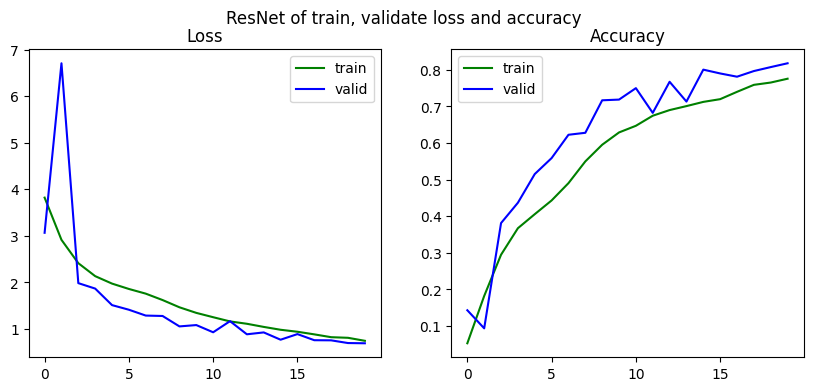

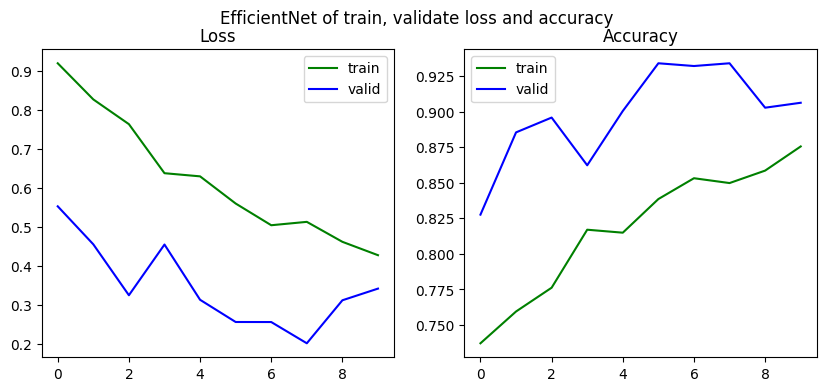

In [ ]:
plot_loss_acc(resnet_result, "ResNet")
plot_loss_acc(efficientnet_result, "EfficientNet")

## Make prediction on test dataset

In [ ]:
def make_prediction(model: torch.nn.Module,
                    dataloader: torch.utils.data.DataLoader,
                    device: torch.cuda.device = device):
  model.eval()
  test_preds = []

  with torch.inference_mode():
    for X, y in tqdm(dataloader, desc="Making prediction..."):
      X, y =X.to(device), y.to(device)
      test_logit = model(X)
      test_pred = torch.argmax(torch.softmax(test_logit, dim=1), dim=1)
      test_preds.append(test_pred.cpu())

  test_pred_tensor = torch.cat(test_preds)
  return test_pred_tensor

### Plotting confusion metrics

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 29.7 MB/s eta 0:00:00


In [ ]:
from torchmetrics import ConfusionMatrix, Accuracy
from mlxtend.plotting import plot_confusion_matrix

**ResNet's prediction**

In [ ]:
# ResNet prediction
resnet_test_preds = make_prediction(resnet,
                                    test_dataloader,
                                    device)

Making prediction...:   0%|          | 0/9 [00:00<?, ?it/s]

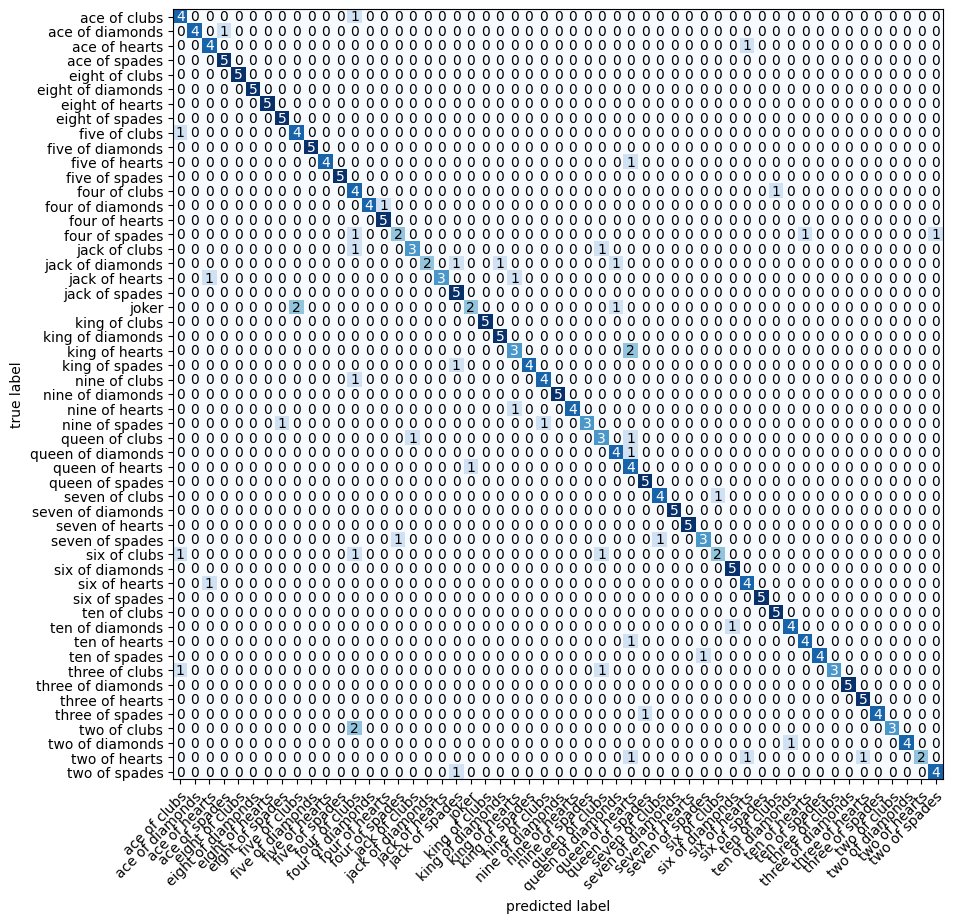

In [ ]:
cm = ConfusionMatrix(num_classes=len(classes_name), task="multiclass")
cm_tensor = cm(resnet_test_preds, torch.tensor(transformed_test_data.targets))
fig, ax = plot_confusion_matrix(conf_mat=cm_tensor.numpy(),
                                class_names=classes_name,
                                figsize=(15,10))

**EfficientNet's prediction**

In [ ]:
# EfficientNet's prediction
efficientnet_test_preds = make_prediction(efficientnet,
                                          test_dataloader,
                                          device)

Making prediction...:   0%|          | 0/9 [00:00<?, ?it/s]

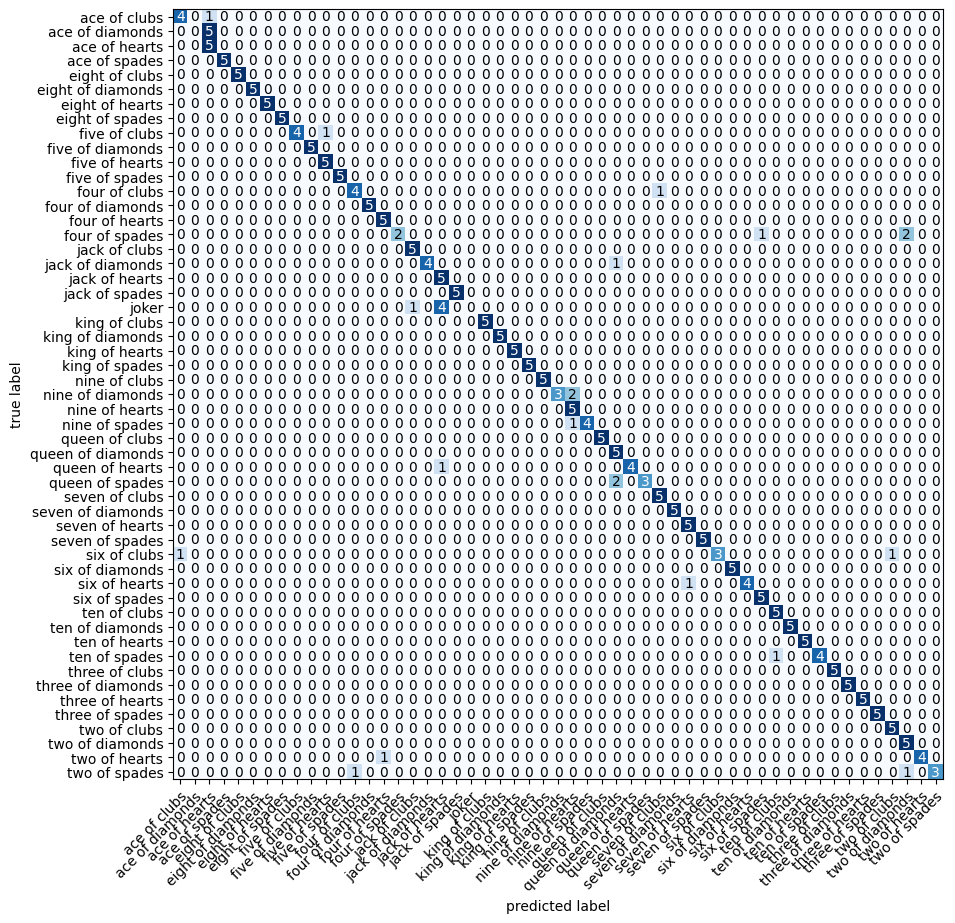

In [ ]:
cm = ConfusionMatrix(num_classes=len(classes_name), task="multiclass")
cm_tensor = cm(efficientnet_test_preds, torch.tensor(transformed_test_data.targets))
fig, ax = plot_confusion_matrix(conf_mat=cm_tensor.numpy(),
                                class_names=classes_name,
                                figsize=(15,10))

### Calculate accuracy score

[Text(0, 0, '0.81'), Text(0, 0, '0.89')]

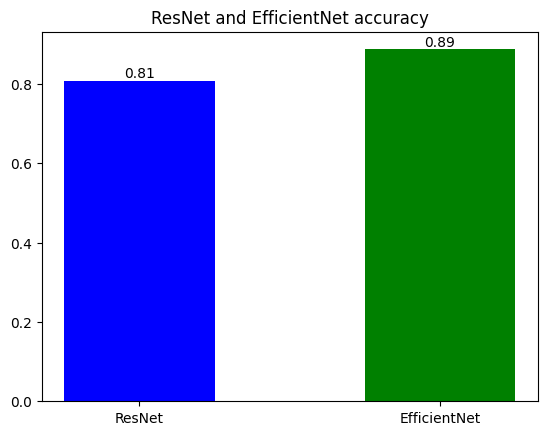

In [ ]:
accuracy = Accuracy(task="multiclass", num_classes=len(classes_name))
resnet_acc = accuracy(resnet_test_preds, torch.tensor(transformed_test_data.targets))
efficientnet_acc = accuracy(efficientnet_test_preds, torch.tensor(transformed_test_data.targets))

acc_chart = plt.bar([1,2], height=[resnet_acc, efficientnet_acc], width=0.5, color=['b', 'g'])
plt.title("ResNet and EfficientNet accuracy")
plt.xticks([1,2], ['ResNet', 'EfficientNet'])
plt.bar_label(acc_chart, fmt="{:.2f}")

# Save and load model

In [ ]:
from pathlib import Path

model_path = Path("model")
model_path.mkdir(parents=True, exist_ok=True)

resnet_model_name = "resnet.pth"
efficientnet_model_name = "efficientnet.pth"

resnet_save_path = model_path / resnet_model_name
efficientnet_save_path = model_path / efficientnet_model_name

torch.save(resnet.state_dict(), resnet_save_path)
torch.save(efficientnet.state_dict(), efficientnet_save_path)

**Load ResNet Model**

In [ ]:
loaded_resnet = torchvision.models.resnet50().to(device)

num_in_features = loaded_resnet.fc.in_features

loaded_resnet.fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=num_in_features,
                    out_features=output_shape,
                    bias=True)).to(device)

loaded_resnet.load_state_dict(torch.load(resnet_save_path))

<ipython-input-103-c89497973e53>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_resnet.load_state_dict(torch.load(resnet_save_path))


<All keys matched successfully>

**Try to predict**

In [ ]:
loaded_resnet_test_preds = make_prediction(loaded_resnet,
                                                  test_dataloader,
                                                  device)

loaded_resnet_acc = accuracy(loaded_resnet_test_preds, torch.tensor(transformed_test_data.targets))

loaded_resnet_acc, resnet_acc

Making prediction...:   0%|          | 0/9 [00:00<?, ?it/s]

(tensor(0.8075), tensor(0.8075))

**Load EfficientNet model**

In [ ]:
loaded_efficientnet = torchvision.models.efficientnet_b0().to(device)

num_in_features = 1280

loaded_efficientnet.classifier = torch.nn.Sequential(
          torch.nn.Dropout(p=0.2),
          torch.nn.Linear(in_features=num_in_features,
                          out_features=output_shape)).to(device)

loaded_efficientnet.load_state_dict(torch.load(efficientnet_save_path))

<ipython-input-104-7bf33cb4d35f>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_efficientnet.load_state_dict(torch.load(efficientnet_save_path))


<All keys matched successfully>

**Try to predict**

In [ ]:
loaded_efficientnet_test_preds = make_prediction(loaded_efficientnet,
                                                  test_dataloader,
                                                  device)

loaded_efficientnet_acc = accuracy(loaded_efficientnet_test_preds, torch.tensor(transformed_test_data.targets))

loaded_efficientnet_acc, efficientnet_acc

Making prediction...:   0%|          | 0/9 [00:00<?, ?it/s]

(tensor(0.8868), tensor(0.8868))